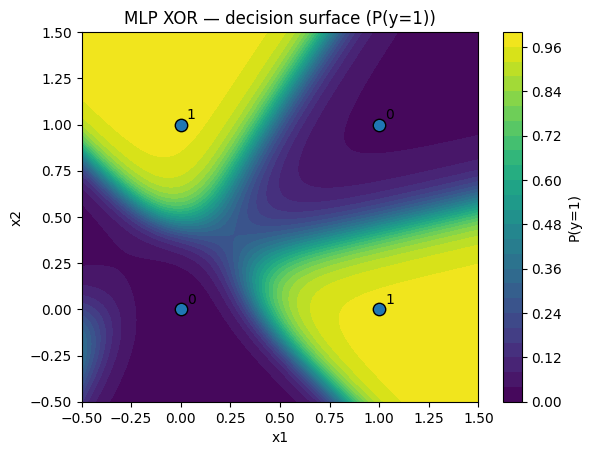

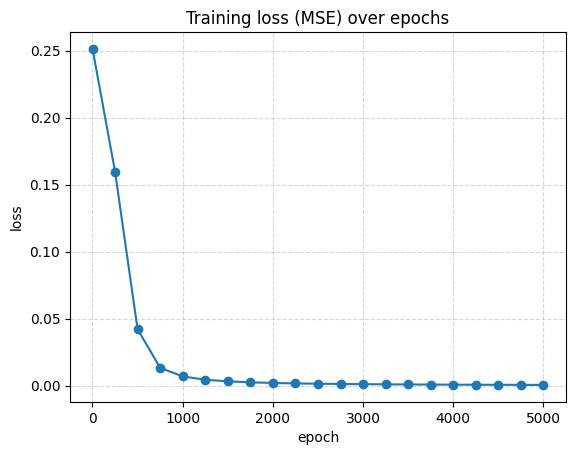

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Balanced dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([[0],[1],[1],[0]], dtype=float)

# Unbalanced dataset (only one class)
# X = np.array([[0,0], [1,1]], dtype=float)
# y = np.array([[0],[0]], dtype=float)


# Activations
def sigmoid(z): return 1/(1+np.exp(-z))
def dsigmoid(a): return a*(1-a)
def tanh(z): return np.tanh(z)
def dtanh(a): return 1 - a**2

# Hyperparams
n_in, n_hidden, n_out = 2, 3, 1
lr, epochs = 0.3, 5000

# Params
W1 = np.random.randn(n_in, n_hidden) * 0.5
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_out) * 0.5
b2 = np.zeros((1, n_out))

# Train
history_e, history_l = [], []
for epoch in range(1, epochs+1):
    # print(epoch)
    # forward
    z1 = X @ W1 + b1
    a1 = tanh(z1)
    z2 = a1 @ W2 + b2
    yhat = sigmoid(z2)

    loss = np.mean((yhat - y)**2)
    
    # backward
    dL_dyhat = 2 * (yhat - y) / y.shape[0]
    dL_dz2 = dL_dyhat * dsigmoid(yhat)
    dL_dW2 = a1.T @ dL_dz2
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    dL_da1 = dL_dz2 @ W2.T
    dL_dz1 = dL_da1 * dtanh(a1)
    dL_dW1 = X.T @ dL_dz1
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # step
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2
    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1

    if epoch == 1 or epoch % 250 == 0:
        history_e.append(epoch)
        history_l.append(float(loss))

# Decision surface
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = sigmoid(tanh(grid @ W1 + b1) @ W2 + b2).reshape(xx.shape)

plt.figure()
cs = plt.contourf(xx, yy, probs, levels=30)
plt.colorbar(cs, label="P(y=1)")
plt.scatter(X[:,0], X[:,1], s=80, edgecolor='k')
for i, (x1, x2) in enumerate(X):
    plt.text(x1+0.03, x2+0.03, f"{int(y[i,0])}")
plt.title("MLP XOR — decision surface (P(y=1))")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

# Loss curve
plt.figure()
plt.plot(history_e, history_l, marker='o')
plt.title("Training loss (MSE) over epochs")
plt.xlabel("epoch"); plt.ylabel("loss")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
